### Implementation of Quantum Boltzmann Machine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram
import math as mt
from qiskit.quantum_info import Pauli

In [ ]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spin_basis_1d # Hilbert space spin basis

In [ ]:
## define model parameters
N=2# number of qubits
J=1.0
g=0.809 # transverse field
h=0.9045 # longitudinal field

basis=spin_basis_1d(N,pauli=True)

params=[h,h, h,h, J ]#[first N hz| next n:hx | nC2: h1zh2z]
h_z=[[params[i],i] for i in range(0,N)]
h_x=[[params[i],i-N] for i in range(N,2*N)]



J_zz=[]
for i in range(0,N-1):
    for j in range(i+1,N):
        J_zz.append([J,i,j])


#static and dynamic list
static=[['zz',J_zz],["x",h_x],["z",h_z]]
dynamic=[]

#ref: manuel bhaiya
no_checks={"check_herm":False,"check_pcon":False,"check_symm":False}

#defining qbm hamiltonian
Hamiltonian_qbm=hamiltonian(static,dynamic,basis=basis,dtype=np.float64,**no_checks)

In [ ]:
def required_operators(num_qubits,params):
    op_list=[]
    nc2=int(num_qubits*(num_qubits-1))/2
    index=list(range(int(2*num_qubits+nc2)))
    
    #first n: Z operators
    for i in range(num_qubits):
        a=["I"]*num_qubits
        a[i]="Z"
        to_append="".join(a)
        op_list.append(to_append)
    
    #next n: X operators
    for i in range(num_qubits):
        a=["I"]*num_qubits
        a[i]="X"
        to_append="".join(a)
        op_list.append(to_append)
    
    #next nC2: ZiZj operators
    for i in range(0,num_qubits-1):
        a=["I"]*num_qubits
        a[i]="Z"
        for j in range(i+1,num_qubits):
            a[j]="Z"
            to_append="".join(a)
            op_list.append(to_append)
            a[j]="I"
    
    to_return=zip(index,params,op_list)
    return to_return

In [ ]:
aa=required_operators(2,params)
print(list(aa))

[(0, 0.9045, 'ZI'), (1, 0.9045, 'IZ'), (2, 0.9045, 'XI'), (3, 0.9045, 'IX'), (4, 1.0, 'ZZ')]


In [ ]:
print(basis)
basis_check=spin_basis_1d(3,pauli=True)
print(Hamiltonian_qbm)

reference states: 
array index   /   Fock state   /   integer repr. 
     0.         |1 1>           3  
     1.         |1 0>           2  
     2.         |0 1>           1  
     3.         |0 0>           0  
static mat: 
  (0, 0)	2.809
  (0, 1)	0.9045
  (0, 2)	0.9045
  (1, 0)	0.9045
  (1, 1)	-1.0
  (1, 3)	0.9045
  (2, 0)	0.9045
  (2, 2)	-1.0
  (2, 3)	0.9045
  (3, 1)	0.9045
  (3, 2)	0.9045
  (3, 3)	-0.8089999999999999


dynamic:



In [ ]:
#finding eigenvalues and eigen-vector
E,V=Hamiltonian_qbm.eigh()#eigen vectors are arranged columnwise.
'''
print(E)
print("_"*10)
print(V)
print(np.shape(V))
np.dot(V[:,1],V[:,3])
print(len(V))
np.square(V)
'''

'\nprint(E)\nprint("_"*10)\nprint(V)\nprint(np.shape(V))\nnp.dot(V[:,1],V[:,3])\nprint(len(V))\nnp.square(V)\n'

In [ ]:
def prob_distn_of_bitstring_from_model(eigenvector_mat,eigen_vals):
    num_of_qubits=np.log2(len(eigen_vals))
    #print(num_of_qubits)
    
    partn_fn=0; prob_eigenvec=[]
    for i in range(0,len(eigen_vals)):
        exp_val=np.exp(eigen_vals[i])
        partn_fn+=exp_val
        prob_eigenvec.append(exp_val)
    prob_eigenvec=[i/partn_fn for i in prob_eigenvec]
    #print(prob_eigenvec)
    
    
    num_bits_in_string=int(2**(num_of_qubits))
    #print(num_bits_in_string)
    sq_all_elements_eigenvecs=np.square(eigenvector_mat)
    prob_distn_dict={}
    num_eigenvecs=np.shape(eigenvector_mat)[1]
    #print(num_eigenvecs)
    for i in range(0,num_bits_in_string):
        sum_temp=0
        for j in range(0,num_eigenvecs):
            #print((i,j))
            sum_temp+=sq_all_elements_eigenvecs[i,j]*(prob_eigenvec[j])
        string="0"+str(int(num_of_qubits))+"b"
        prob_distn_dict[format(int(i),string)]=sum_temp
    return prob_distn_dict
            
    

In [ ]:
returned_dict=prob_distn_of_bitstring_from_model(V,E)
print(returned_dict)
np.sum(list(returned_dict.values()))

{'00': 0.8412713943425358, '01': 0.06134403234474942, '10': 0.06134403234474943, '11': 0.03604054096796533}


1.0

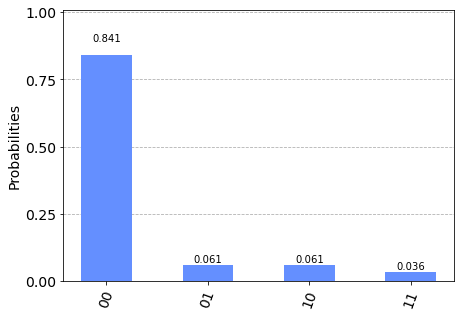

In [ ]:
plot_histogram(returned_dict)

#### sample training data-set from some known probability distn

In [ ]:
from scipy.stats import binom
def generateSamples(num_qubit, numSamples,p):
    allSamples = []
    for i in range(1):
        data_binom = binom.rvs(n=2**(num_qubit)-1,p=p,loc=0,size=numSamples) #  16 if we use 4 qubits 
        x = []
        for i in data_binom:
            string="0"+str(int(num_qubit))+"b"
            x.append(format(int(i),string))
            #x.append('{0:04b}'.format(i))                       # 6 must be changed to a 4 if the use 4 qubits 
    return x

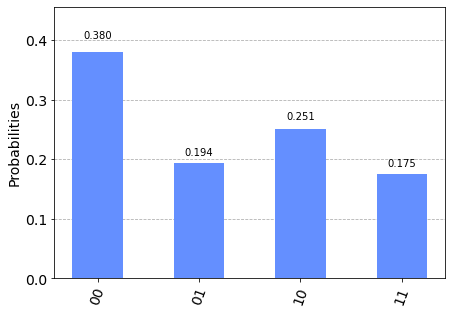

In [ ]:
ts = generateSamples(2,500,0.1)         
temp = np.unique(ts,return_counts=True)
TS = {temp[0][i]:temp[1][i] for i in range(len(temp[0]))}
ps = generateSamples(2,500,0.7)             ## this on is in the middle of the tomo
pemp = np.unique(ps,return_counts=True)
PS = {pemp[0][i]:pemp[1][i] for i in range(len(pemp[0]))}
both = list(np.append(ts,ps))          ## this one has both
stemp = np.unique(both,return_counts=True)
trainingDict = {stemp[0][i]:stemp[1][i]/stemp[1].sum() for i in range(len(stemp[0]))} 
plot_histogram(trainingDict)

### Sampling the expectation value of operator
1.  from data
2. from the model

In [ ]:
# need to map strings to corresponding quantum operator
dimension_of_vector=2**N

In [ ]:
def string_to_vec(binary_string_input):
    '''
    to_return=np.zeros((1,2**(len(binary_string_input))))
    replace_with_one_at=int(binary_string_input,2)
    to_return[0,replace_with_one_at]=1
    '''
    from qiskit.quantum_info import Statevector #string to vector conversion
    to_return=Statevector.from_label(binary_string_input)
    to_return=np.real(to_return)
    #shape of matrix returned= (value,1)
    to_return=np.reshape(to_return,(len(to_return),1))
    return to_return


In [ ]:
def vec_to_string(vector_input,dimn_input_tuple):
    '''
    input vector's shape= (num_rows,1)
    '''
    from qiskit.quantum_info import Statevector
    qiskit_statevec=Statevector(vector_input,dims=dimn_input_tuple)
    dict_statevec=list(qiskit_statevec.to_dict().keys())
    string_to_return= dict_statevec[0]
    return string_to_return

In [ ]:
bbb=vec_to_string(np.array([0,1,0,0]),(2,2))
bbb

'01'

In [ ]:
def matrix_tensor_prod_of_operators(string_tensor_prod):
    from qiskit.quantum_info.operators import Pauli
    tensor_prod=Pauli(string_tensor_prod).to_matrix()
    return tensor_prod
print(matrix_tensor_prod_of_operators('IX'))

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In [ ]:
a=np.array([[1,2],[3,4]])
hehe={"0":0.6,"1":0.3}
print(list(hehe.keys()))
hehe[list(hehe.keys())[1]]

In [ ]:
def expectation_of_operator(operator_matrix,dict_bitstring_and_prob):
    
    #inner product
    string_list=list(dict_bitstring_and_prob.keys())
    inner_product_list=[]
    for i in range(len(dict_bitstring_and_prob)):
        vector_of_str=computational_basis_vec(string_list[i])
        #print(vector_of_str)
        #print("_"*10)
        #print(np.dot(operator_matrix,vector_of_str))
        to_append=np.dot( vector_of_str.T,
                                  np.dot(operator_matrix,vector_of_str)
                                 ) 
        inner_product_list.append(np.real(to_append)[0][0])
    
    #print(inner_product_list)
    #calculating the expectation value
    sum_val=0
    for i in range(len(inner_product_list)):
        prob=dict_bitstring_and_prob[list(dict_bitstring_and_prob.keys())[i]]
        #print("prob:",prob/sum(list(dict_bitstring_and_prob.values())))
        sum_val+=prob*inner_product_list[i]
        
    return sum_val

In [ ]:
some_op=Pauli('IZII').to_matrix()
expectation_of_operator(some_op,trainingDict)

0.5959999999999999

### Updating parameters

In [ ]:
a=Pauli('IX')
b=a.to_matrix()
print(b)